In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
import requests
import networkx as nx
from ipywidgets import interact
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel(r"/content/OrdersV2.xlsx")

In [3]:
df.head()

Row ID        Order ID Order Date  Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
1       2  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
2       3  CA-2016-138688 2016-06-12 2016-06-16    Second Class    DV-13045   
3       4  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   
4       5  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       42420   South  FUR-BO-10001798        Furniture    Bookcases   
1       42420   South  FUR-CH-10000454        Furniture       Chairs   
2       90036    West  OFF-LA-10000240  Office Supplies       Labels   
3       33311   South  FUR-TA-10000577        Furniture       Tables   
4       33311   South  OFF-ST-10000760  Office Supplies      Storage   

                                        Product Name     Sales  Quantity  \
0                  Bush Somerset Collection Bookcase  261.9600         2   
1  Hon Deluxe Fabric Upholstered Stacking Chairs,...  731.9400         3   
2  Self-Adhesive Address Labels for Typewriters b...   14.6200         2   
3      Bretford CR4500 Series Slim Rectangular Table  957.5775         5   
4                     Eldon Fold 'N Roll Cart System   22.3680         2   

   Discount    Profit  
0      0.00   41.9136  
1      0.00  219.5820  
2      0.00    6.8714  
3      0.45 -383.0310  
4      0.20    2.5164  

[5 rows x 21 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [5]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [6]:
df.columns.tolist()

['Row ID',
 'Order ID',
 'Order Date',
 'Ship Date',
 'Ship Mode',
 'Customer ID',
 'Customer Name',
 'Segment',
 'Country',
 'City',
 'State',
 'Postal Code',
 'Region',
 'Product ID',
 'Category',
 'Sub-Category',
 'Product Name',
 'Sales',
 'Quantity',
 'Discount',
 'Profit']

In [7]:
holiday_data = pd.read_csv(r"/content/US Holiday Dates (2004-2021).csv")
holiday_data.head()

Date      Holiday    WeekDay  Month  Day  Year
0  2004-07-04  4th of July     Sunday      7    4  2004
1  2005-07-04  4th of July     Monday      7    4  2005
2  2006-07-04  4th of July    Tuesday      7    4  2006
3  2007-07-04  4th of July  Wednesday      7    4  2007
4  2008-07-04  4th of July     Friday      7    4  2008

In [8]:
holiday_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342 entries, 0 to 341
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Date     342 non-null    object
 1   Holiday  342 non-null    object
 2   WeekDay  342 non-null    object
 3   Month    342 non-null    int64 
 4   Day      342 non-null    int64 
 5   Year     342 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 16.2+ KB


In [9]:
filtered_holiday_data = holiday_data[(holiday_data['Year'] >= 2014) & (holiday_data['Year'] <= 2018)]

filtered_holiday_data

Date         Holiday    WeekDay  Month  Day  Year
10   2014-07-04     4th of July     Friday      7    4  2014
11   2015-07-04     4th of July   Saturday      7    4  2015
12   2016-07-04     4th of July     Monday      7    4  2016
13   2017-07-04     4th of July    Tuesday      7    4  2017
14   2018-07-04     4th of July  Wednesday      7    4  2018
..          ...             ...        ...    ...  ...   ...
326  2016-03-27  Western Easter     Sunday      3   27  2016
328  2018-04-01  Western Easter     Sunday      4    1  2018
331  2015-04-05  Western Easter     Sunday      4    5  2015
338  2017-04-16  Western Easter     Sunday      4   16  2017
339  2014-04-20  Western Easter     Sunday      4   20  2014

[95 rows x 6 columns]

In [10]:
filtered_holiday_data['Date'] = pd.to_datetime(filtered_holiday_data['Date'])

In [11]:
merged_df = pd.merge(df, filtered_holiday_data, left_on='Order Date', right_on='Date', how='left')

merged_df['Holiday'] = merged_df['Holiday'].fillna('No Holiday')

merged_df.head(10)

Row ID        Order ID Order Date  Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
1       2  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
2       3  CA-2016-138688 2016-06-12 2016-06-16    Second Class    DV-13045   
3       4  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   
4       5  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   
5       6  CA-2014-115812 2014-06-09 2014-06-14  Standard Class    BH-11710   
6       7  CA-2014-115812 2014-06-09 2014-06-14  Standard Class    BH-11710   
7       8  CA-2014-115812 2014-06-09 2014-06-14  Standard Class    BH-11710   
8       9  CA-2014-115812 2014-06-09 2014-06-14  Standard Class    BH-11710   
9      10  CA-2014-115812 2014-06-09 2014-06-14  Standard Class    BH-11710   

     Customer Name    Segment        Country             City  ...     Sales  \
0      Claire Gute   Consumer  United States        Henderson  ...  261.9600   
1      Claire Gute   Consumer  United States        Henderson  ...  731.9400   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   14.6200   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...  957.5775   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   22.3680   
5  Brosina Hoffman   Consumer  United States      Los Angeles  ...   48.8600   
6  Brosina Hoffman   Consumer  United States      Los Angeles  ...    7.2800   
7  Brosina Hoffman   Consumer  United States      Los Angeles  ...  907.1520   
8  Brosina Hoffman   Consumer  United States      Los Angeles  ...   18.5040   
9  Brosina Hoffman   Consumer  United States      Los Angeles  ...  114.9000   

   Quantity Discount    Profit Date     Holiday WeekDay  Month  Day  Year  
0         2     0.00   41.9136  NaT  No Holiday     NaN    NaN  NaN   NaN  
1         3     0.00  219.5820  NaT  No Holiday     NaN    NaN  NaN   NaN  
2         2     0.00    6.8714  NaT  No Holiday     NaN    NaN  NaN   NaN  
3         5     0.45 -383.0310  NaT  No Holiday     NaN    NaN  NaN   NaN  
4         2     0.20    2.5164  NaT  No Holiday     NaN    NaN  NaN   NaN  
5         7     0.00   14.1694  NaT  No Holiday     NaN    NaN  NaN   NaN  
6         4     0.00    1.9656  NaT  No Holiday     NaN    NaN  NaN   NaN  
7         6     0.20   90.7152  NaT  No Holiday     NaN    NaN  NaN   NaN  
8         3     0.20    5.7825  NaT  No Holiday     NaN    NaN  NaN   NaN  
9         5     0.00   34.4700  NaT  No Holiday     NaN    NaN  NaN   NaN  

[10 rows x 27 columns]

In [12]:
#df['Order Date'] = pd.to_datetime(df['Order Date'])
#filtered_holiday_data['Date'] = pd.to_datetime(filtered_holiday_data['Date'])

In [13]:
merged_df['Holiday'].value_counts()

Holiday
No Holiday                     9300
Labor Day Weekend               102
Labor Day                        85
Veterans Day                     62
Christmas Day                    58
Christmas Eve                    54
Thanksgiving Day                 52
Memorial Day                     49
Columbus Day                     40
New Year’s Eve                   32
Western Easter                   30
Martin Luther King, Jr. Day      24
Juneteenth                       23
Eastern Easter                   21
Thanksgiving Eve                 19
Washington's Birthday            17
Valentine’s Day                  16
4th of July                      14
New Year's Day                   10
Name: count, dtype: int64

In [14]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10008 entries, 0 to 10007
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         10008 non-null  int64         
 1   Order ID       10008 non-null  object        
 2   Order Date     10008 non-null  datetime64[ns]
 3   Ship Date      10008 non-null  datetime64[ns]
 4   Ship Mode      10008 non-null  object        
 5   Customer ID    10008 non-null  object        
 6   Customer Name  10008 non-null  object        
 7   Segment        10008 non-null  object        
 8   Country        10008 non-null  object        
 9   City           10008 non-null  object        
 10  State          10008 non-null  object        
 11  Postal Code    10008 non-null  int64         
 12  Region         10008 non-null  object        
 13  Product ID     10008 non-null  object        
 14  Category       10008 non-null  object        
 15  Sub-Category   1000

In [15]:
columns_to_drop = ['Date', 'WeekDay', 'Month', 'Day', 'Year']
for col in columns_to_drop:
    if col in merged_df.columns:
        merged_df = merged_df.drop(col, axis=1)

merged_df.head()

Row ID        Order ID Order Date  Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
1       2  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
2       3  CA-2016-138688 2016-06-12 2016-06-16    Second Class    DV-13045   
3       4  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   
4       5  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ... Region  \
0      Claire Gute   Consumer  United States        Henderson  ...  South   
1      Claire Gute   Consumer  United States        Henderson  ...  South   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   West   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...  South   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...  South   

        Product ID         Category Sub-Category  \
0  FUR-BO-10001798        Furniture    Bookcases   
1  FUR-CH-10000454        Furniture       Chairs   
2  OFF-LA-10000240  Office Supplies       Labels   
3  FUR-TA-10000577        Furniture       Tables   
4  OFF-ST-10000760  Office Supplies      Storage   

                                        Product Name     Sales Quantity  \
0                  Bush Somerset Collection Bookcase  261.9600        2   
1  Hon Deluxe Fabric Upholstered Stacking Chairs,...  731.9400        3   
2  Self-Adhesive Address Labels for Typewriters b...   14.6200        2   
3      Bretford CR4500 Series Slim Rectangular Table  957.5775        5   
4                     Eldon Fold 'N Roll Cart System   22.3680        2   

   Discount    Profit     Holiday  
0      0.00   41.9136  No Holiday  
1      0.00  219.5820  No Holiday  
2      0.00    6.8714  No Holiday  
3      0.45 -383.0310  No Holiday  
4      0.20    2.5164  No Holiday  

[5 rows x 22 columns]

In [16]:
merged_df.shape

(10008, 22)

In [17]:
merged_df.isnull().sum().sum()

0

<Axes: xlabel='Order Date'>

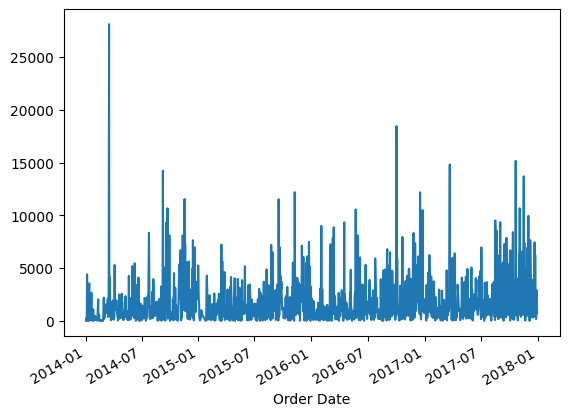

In [18]:
merged_df.groupby('Order Date')['Sales'].sum().plot()

In [19]:
Q1 = df['Sales'].quantile(0.25)
Q3 = df['Sales'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['Sales'] < Q1 - 1.5 * IQR) | (df['Sales'] > Q3 + 1.5 * IQR)]

In [20]:
outliers.shape

(1167, 21)

In [21]:
customer_metrics = df.groupby('Customer ID').agg({'Sales': 'mean', 'Order ID': 'nunique'})
customer_metrics.rename(columns={'Sales': 'Average Spend', 'Order ID': 'Repeat Purchases'}, inplace=True)
customer_metrics.head(10)

Average Spend  Repeat Purchases
Customer ID                                 
AA-10315        505.778182                 5
AA-10375         70.426000                 9
AA-10480        149.209333                 4
AA-10645        282.607500                 6
AB-10015        147.692667                 3
AB-10060        430.867778                 8
AB-10105        723.678550                10
AB-10150         80.559167                 5
AB-10165         79.559857                 8
AB-10255         65.323714                 9

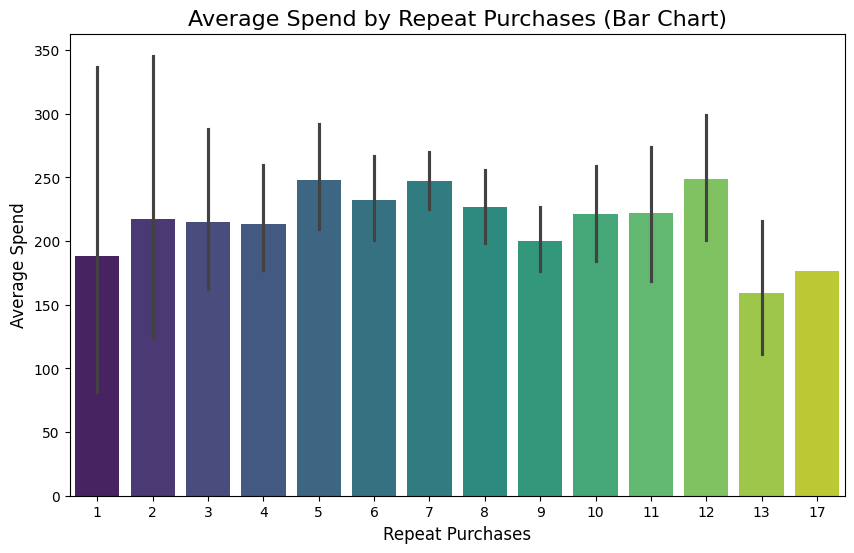

In [22]:
plt.figure(figsize=(10, 6))
sns.barplot(data=customer_metrics, x='Repeat Purchases', y='Average Spend', palette='viridis')
plt.title('Average Spend by Repeat Purchases (Bar Chart)', fontsize=16)
plt.xlabel('Repeat Purchases', fontsize=12)
plt.ylabel('Average Spend', fontsize=12)
plt.show()

In [23]:
!pip install ydata_profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.9/390.9 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 19.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 37.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 79.6 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=069708d19d830c9ff5065a585879df20a878c6ea60020f9909155d55ee125a2d
  Stored in directory: /root/.cache/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
Successfully built htmlmin


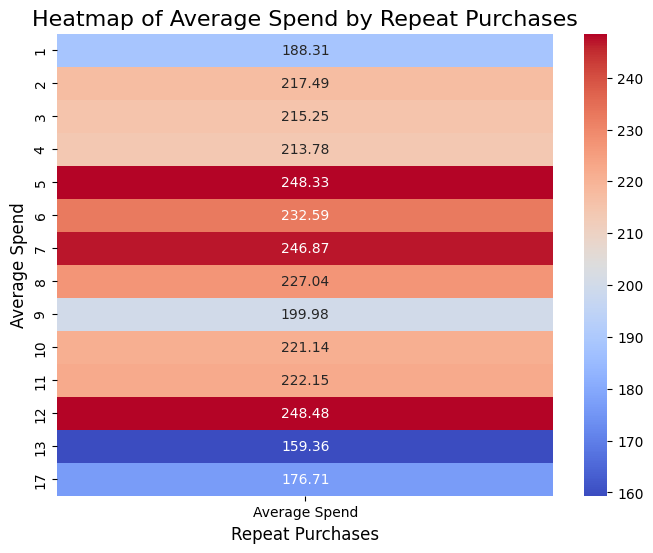

In [24]:
heatmap_data = customer_metrics.pivot_table(values='Average Spend', index='Repeat Purchases', aggfunc='mean')

plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt='.2f')
plt.title('Heatmap of Average Spend by Repeat Purchases', fontsize=16)
plt.xlabel('Repeat Purchases', fontsize=12)
plt.ylabel('Average Spend', fontsize=12)
plt.show()

In [25]:
from ydata_profiling import ProfileReport

profile = ProfileReport(merged_df, title="Merged Data Profile Report", explorative=True)

profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [26]:
top_products = merged_df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(10)
top_products

Product Name
Canon imageCLASS 2200 Advanced Copier                                          61599.824
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind    27453.384
Cisco TelePresence System EX90 Videoconferencing Unit                          22638.480
HON 5400 Series Task Chairs for Big and Tall                                   21870.576
GBC DocuBind TL300 Electric Binding System                                     19823.479
GBC Ibimaster 500 Manual ProClick Binding System                               19024.500
Hewlett Packard LaserJet 3310 Copier                                           18839.686
HP Designjet T520 Inkjet Large Format Printer - 24" Color                      18374.895
GBC DocuBind P400 Electric Binding System                                      17965.068
High Speed Automatic Electric Letter Opener                                    17030.312
Name: Sales, dtype: float64

In [27]:
top_products_profit = merged_df.groupby('Product Name')['Profit'].sum().sort_values(ascending=False).head(10)
top_products_profit

Product Name
Canon imageCLASS 2200 Advanced Copier                                          25199.9280
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind     7753.0390
Hewlett Packard LaserJet 3310 Copier                                            6983.8836
Canon PC1060 Personal Laser Copier                                              4570.9347
HP Designjet T520 Inkjet Large Format Printer - 24" Color                       4094.9766
Ativa V4110MDD Micro-Cut Shredder                                               3772.9461
3D Systems Cube Printer, 2nd Generation, Magenta                                3717.9714
Plantronics Savi W720 Multi-Device Wireless Headset System                      3696.2820
Ibico EPK-21 Electric Binding System                                            3345.2823
Zebra ZM400 Thermal Label Printer                                               3343.5360
Name: Profit, dtype: float64

In [28]:
customer_metrics = merged_df.groupby('Customer ID').agg({'Sales': 'sum', 'Order ID': 'nunique'}).reset_index()

customer_metrics['Segment'] = 'Low'
customer_metrics.loc[customer_metrics['Sales'] > customer_metrics['Sales'].quantile(0.75), 'Segment'] = 'High Spender'
customer_metrics.loc[customer_metrics['Order ID'] > customer_metrics['Order ID'].quantile(0.75), 'Segment'] = 'Frequent Buyer'

customer_metrics[['Customer ID', 'Sales', 'Order ID', 'Segment']]

Customer ID     Sales  Order ID         Segment
0      AA-10315  5563.560         5    High Spender
1      AA-10375  1056.390         9  Frequent Buyer
2      AA-10480  1790.512         4             Low
3      AA-10645  5086.935         6    High Spender
4      AB-10015   886.156         3             Low
..          ...       ...       ...             ...
788    XP-21865  2374.658        11  Frequent Buyer
789    YC-21895  5454.350         5    High Spender
790    YS-21880  6720.444         8    High Spender
791    ZC-21910  8025.707        13  Frequent Buyer
792    ZD-21925  1493.944         5             Low

[793 rows x 4 columns]

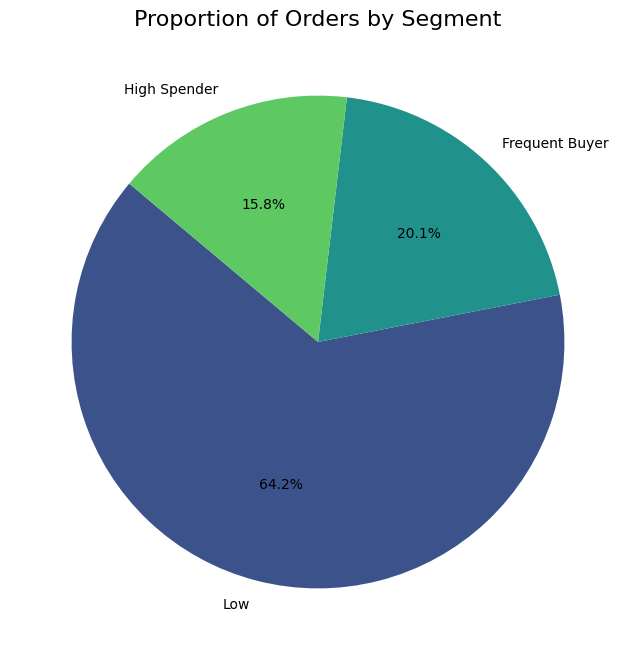

In [29]:
segment_orders = customer_metrics['Segment'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(segment_orders, labels=segment_orders.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', len(segment_orders)))
plt.title('Proportion of Orders by Segment', fontsize=16)
plt.show()

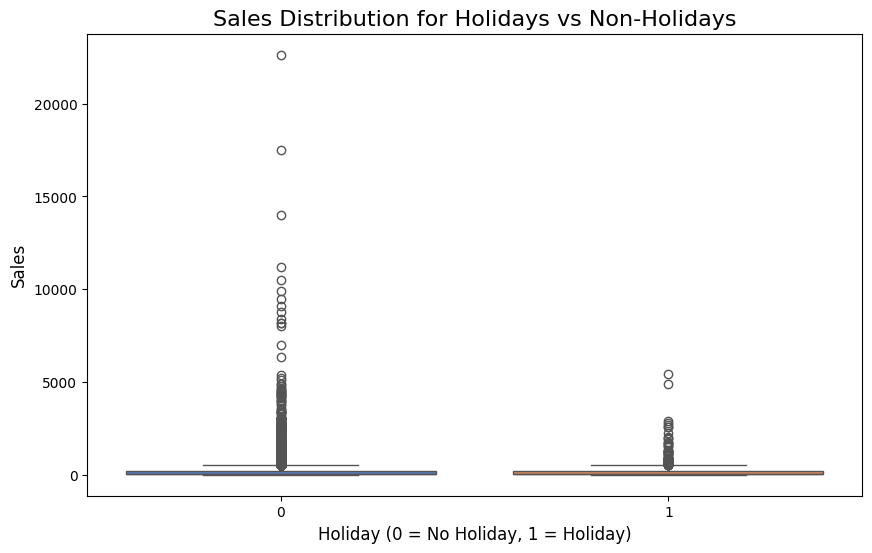

In [30]:
merged_df['Holiday_Flag'] = merged_df['Holiday'].apply(lambda x: 0 if x == 'No Holiday' else 1)

plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_df, x='Holiday_Flag', y='Sales', palette='muted')
plt.title('Sales Distribution for Holidays vs Non-Holidays', fontsize=16)
plt.xlabel('Holiday (0 = No Holiday, 1 = Holiday)', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.show()

In [31]:
holiday_sales_by_region2 = merged_df[merged_df['Holiday'] != 'No Holiday'].groupby(['Region', 'Holiday'])['Sales'].sum().reset_index()

fig = px.bar(holiday_sales_by_region2,
             x='Region',
             y='Sales',
             color='Holiday',
             title='Impact of Holidays on Sales by Region',
             barmode='stack')

fig.update_layout(xaxis_title='Region', yaxis_title='Total Sales', xaxis={'categoryorder':'total descending'})
fig.show()

In [32]:
import plotly.express as px

holiday_sales_pivot = holiday_sales_by_region2.pivot_table(values='Sales', index='Region', columns='Holiday', aggfunc='sum')

fig = px.imshow(holiday_sales_pivot.values,
                labels=dict(x="Holiday", y="Region", color="Total Sales"),
                x=holiday_sales_pivot.columns,
                y=holiday_sales_pivot.index,
                title="Impact of Holidays on Sales by Region")

fig.show()

In [33]:
import plotly.express as px

sales_by_category = merged_df.groupby('Category')['Sales'].sum().reset_index()

fig = px.bar(sales_by_category,
             x='Category',
             y='Sales',
             title='Total Sales by Product Category',
             color='Category')
fig.show()

In [34]:
sales_by_region = merged_df.groupby('Region')['Sales'].sum().reset_index()

fig = px.bar(sales_by_region,
             x='Region',
             y='Sales',
             title='Sales by Region')
fig.show()

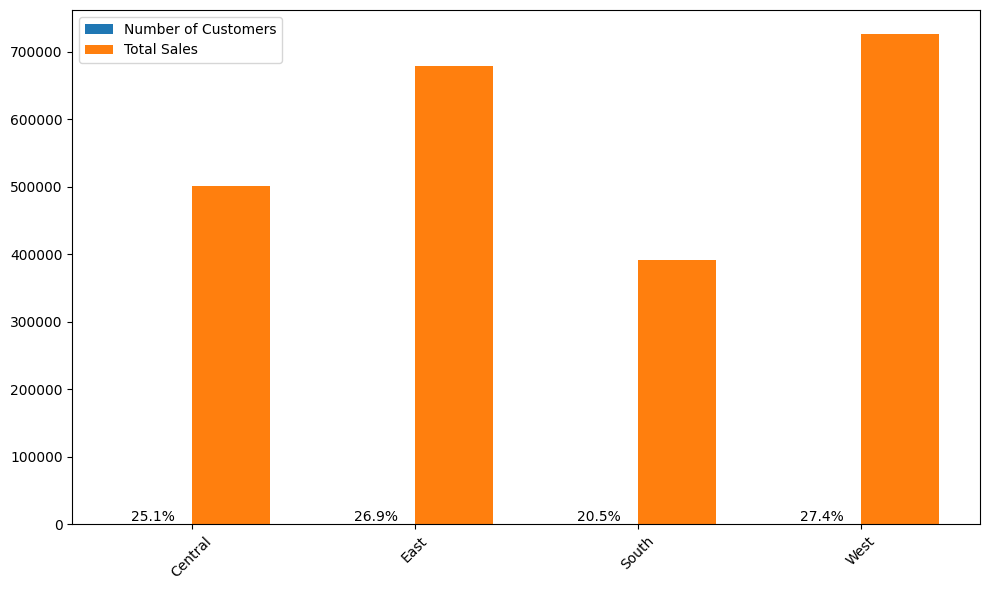

In [35]:
customer_sales_by_region = df.groupby('Region').agg(
    customer_count=('Customer ID', 'nunique'),
    total_sales=('Sales', 'sum')
).reset_index()

total_customers = customer_sales_by_region['customer_count'].sum()
customer_sales_by_region['customer_percentage'] = (customer_sales_by_region['customer_count'] / total_customers) * 100

fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35
index = np.arange(len(customer_sales_by_region))

bar1 = ax.bar(index - bar_width/2, customer_sales_by_region['customer_count'], bar_width, label='Number of Customers')
bar2 = ax.bar(index + bar_width/2, customer_sales_by_region['total_sales'], bar_width, label='Total Sales')

ax.set_xticks(index)
ax.set_xticklabels(customer_sales_by_region['Region'], rotation=45)
ax.legend()

for i, rect in enumerate(bar1):
    height = rect.get_height()
    percentage = customer_sales_by_region['customer_percentage'].iloc[i]
    ax.text(rect.get_x() + rect.get_width() / 2, height, f'{percentage:.1f}%',
            ha='center', va='bottom', fontsize=10, color='black')

plt.tight_layout()
plt.show()

In [36]:
sales_by_holiday = merged_df[merged_df['Holiday'] != 'No Holiday'] \
    .groupby('Holiday')['Sales'].sum().reset_index()

fig = px.bar(sales_by_holiday,
             x='Holiday',
             y='Sales',
             title='Sales by Holiday')
fig.show()

In [37]:
daily_sales = df.groupby('Order Date')['Sales'].sum().reset_index()
average_sales_per_day = daily_sales['Sales'].mean()
print(f"Average Sales Per Day: ${average_sales_per_day:.2f}")

Average Sales Per Day: $1857.07


In [38]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Month'] = df['Order Date'].dt.month
df['Year'] = df['Order Date'].dt.year

monthly_sales = df.groupby(['Year', 'Month'])['Sales'].sum().reset_index()

fig = px.line(monthly_sales,
              x='Month',
              y='Sales',
              color='Year',
              title='Monthly Revenue Growth')
fig.show()

In [39]:
repeat_buyers = df.groupby('Customer ID')['Order ID'].nunique().reset_index()
repeat_buyers['Repeat Purchases'] = repeat_buyers['Order ID'] > 1

fig = px.histogram(repeat_buyers,
                   x='Repeat Purchases',
                   title='Customer Retention: Repeat Purchases')
fig.show()

In [40]:
customer_sales_segmented = df.groupby(['Segment', 'Category'])['Sales'].sum().reset_index()

fig = px.bar(customer_sales_segmented,
             x='Segment',
             y='Sales',
             color='Category',
             title='Customer Segmentation by Product Category',
             barmode='group')
fig.show()

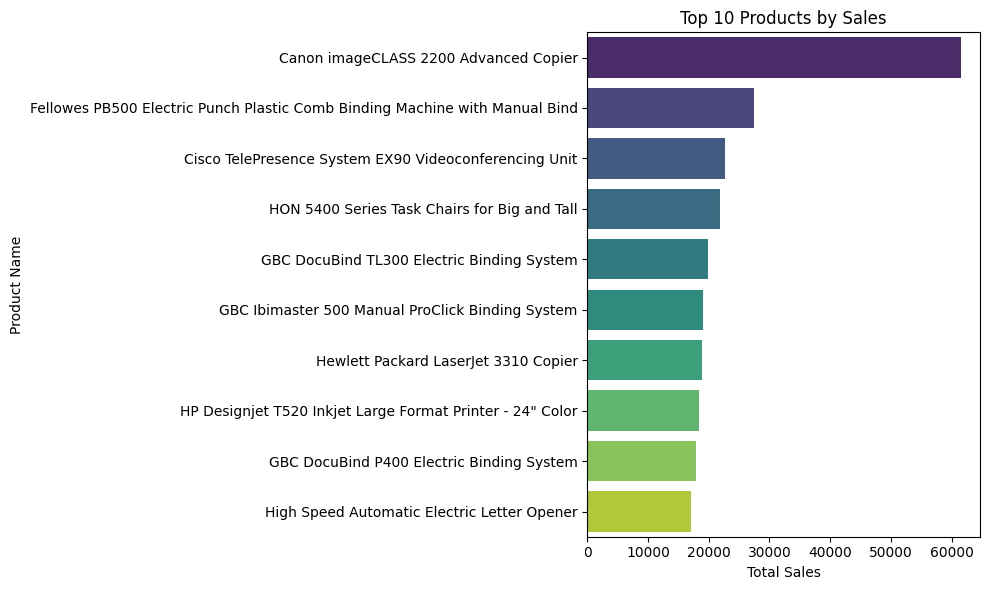

In [41]:
top_products = df.groupby('Product Name')['Sales'].sum().nlargest(10).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Sales', y='Product Name', data=top_products, palette='viridis')
plt.title('Top 10 Products by Sales')
plt.xlabel('Total Sales')
plt.ylabel('Product Name')
plt.tight_layout()
plt.show()

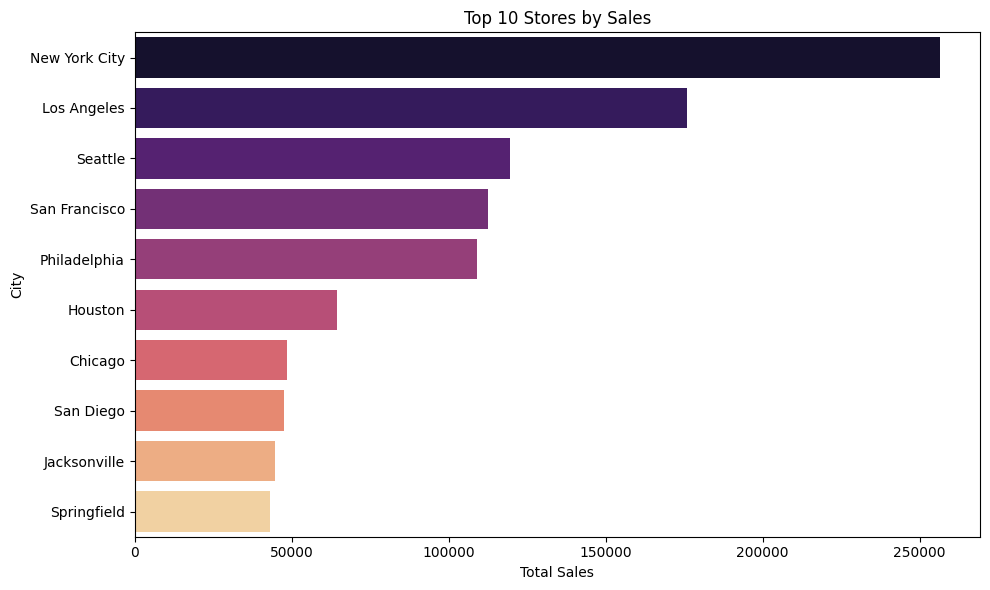

In [42]:
top_stores = df.groupby('City')['Sales'].sum().nlargest(10).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Sales', y='City', data=top_stores, palette='magma')
plt.title('Top 10 Stores by Sales')
plt.xlabel('Total Sales')
plt.ylabel('City')
plt.tight_layout()
plt.show()

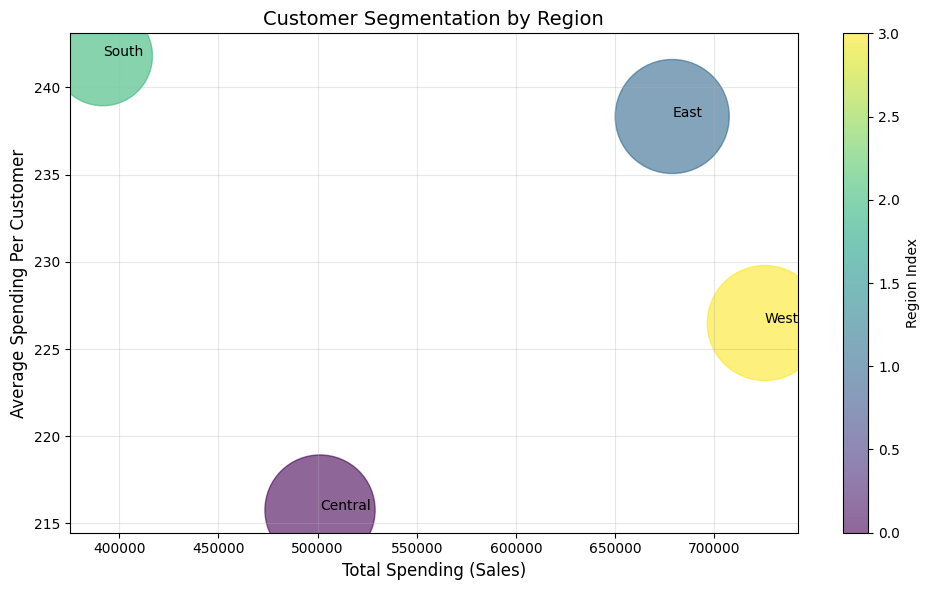

In [43]:
customer_segmentation = df.groupby('Region').agg(
    total_spent=('Sales', 'sum'),
    avg_spend=('Sales', 'mean'),
    customer_count=('Customer ID', 'nunique')
).reset_index()

plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    customer_segmentation['total_spent'],
    customer_segmentation['avg_spend'],
    s=customer_segmentation['customer_count'] * 10,  # Scale bubble size
    alpha=0.6,
    c=range(len(customer_segmentation)),  # Color for each region
    cmap='viridis'
)

for i, row in customer_segmentation.iterrows():
    plt.text(row['total_spent'], row['avg_spend'], row['Region'], fontsize=10)

plt.title('Customer Segmentation by Region', fontsize=14)
plt.xlabel('Total Spending (Sales)', fontsize=12)
plt.ylabel('Average Spending Per Customer', fontsize=12)
plt.colorbar(scatter, label='Region Index')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

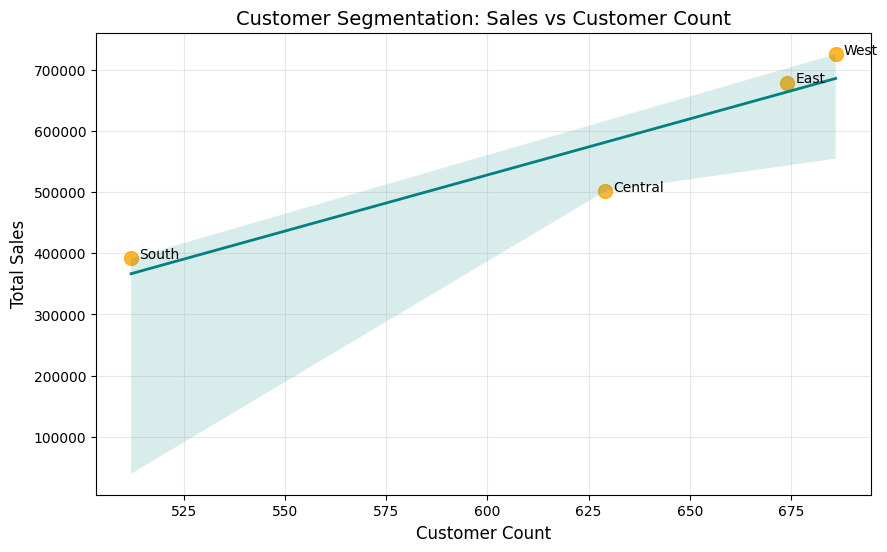

In [44]:
plt.figure(figsize=(10, 6))
sns.regplot(
    data=customer_segmentation,
    x='customer_count',
    y='total_spent',
    scatter_kws={'s': 100, 'color': 'orange'},  # Marker size and color
    line_kws={'color': 'teal', 'lw': 2}  # Trendline color and width
)

for i in range(customer_segmentation.shape[0]):
    plt.text(
        customer_segmentation['customer_count'][i] + 2,
        customer_segmentation['total_spent'][i],
        customer_segmentation['Region'][i],
        fontsize=10
    )

plt.title('Customer Segmentation: Sales vs Customer Count', fontsize=14)
plt.xlabel('Customer Count', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.grid(alpha=0.3)
plt.show()

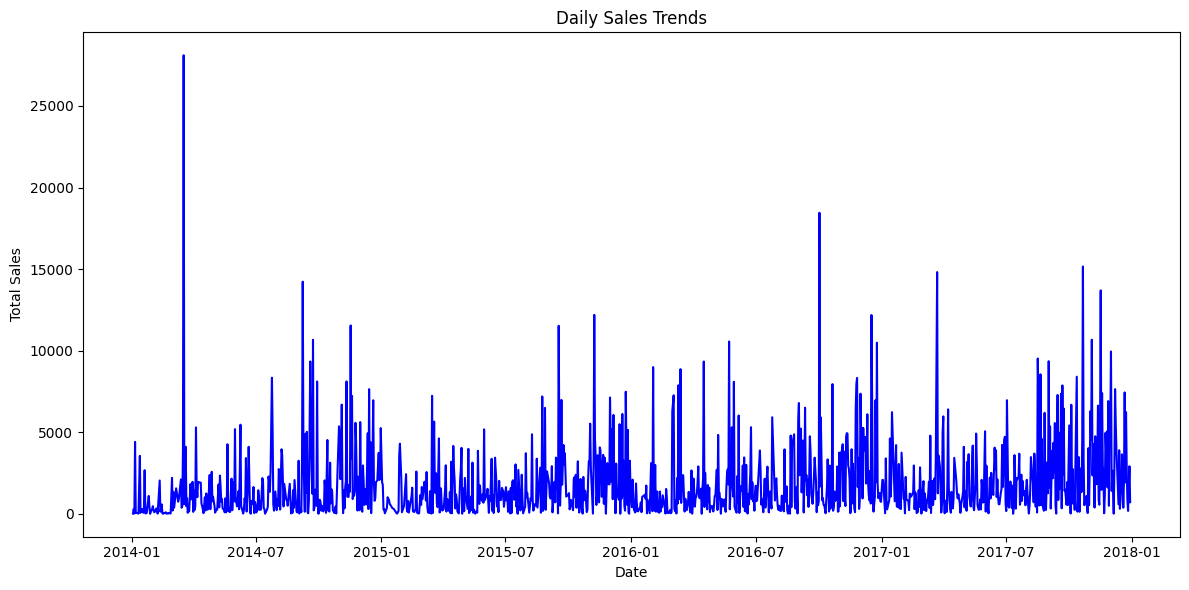

In [45]:
daily_sales = df.groupby('Order Date')['Sales'].sum().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(daily_sales['Order Date'], daily_sales['Sales'], label='Daily Sales', color='blue')
plt.title('Daily Sales Trends')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()

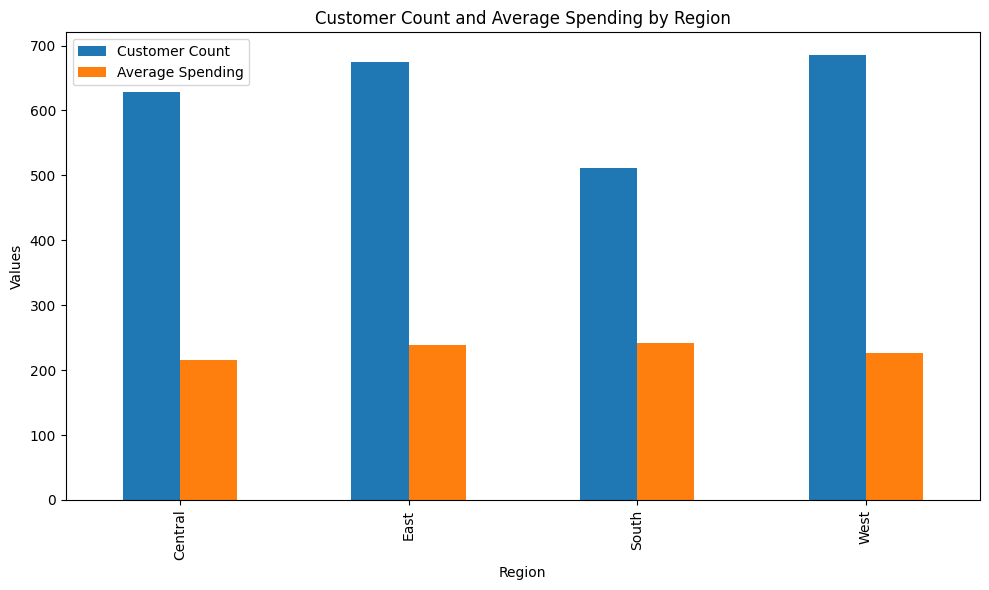

In [46]:
region_data = df.groupby('Region').agg(
    customer_count=('Customer ID', 'nunique'),
    avg_spend=('Sales', 'mean')
).reset_index()

region_data.plot(x='Region', kind='bar', figsize=(10, 6))
plt.title('Customer Count and Average Spending by Region')
plt.xlabel('Region')
plt.ylabel('Values')
plt.legend(['Customer Count', 'Average Spending'])
plt.tight_layout()
plt.show()

In [47]:
#type(heat_data)

In [48]:
#from geopy.geocoders import Nominatim
#from geopy.exc import GeocoderTimedOut

#geolocator = Nominatim(user_agent="my_geocoder")

#def get_coordinates(city):
    #try:
        #location = geolocator.geocode(city)
        #if location:
            #return location.latitude, location.longitude
        #else:
            #return None, None
    #except Exception as e:
        #print(f"Error geocoding {city}: {e}")
        #return None, None

#geo_data[['Latitude','Longitude']] = geo_data['City'].apply(get_coordinates).tolist()

#geo_data

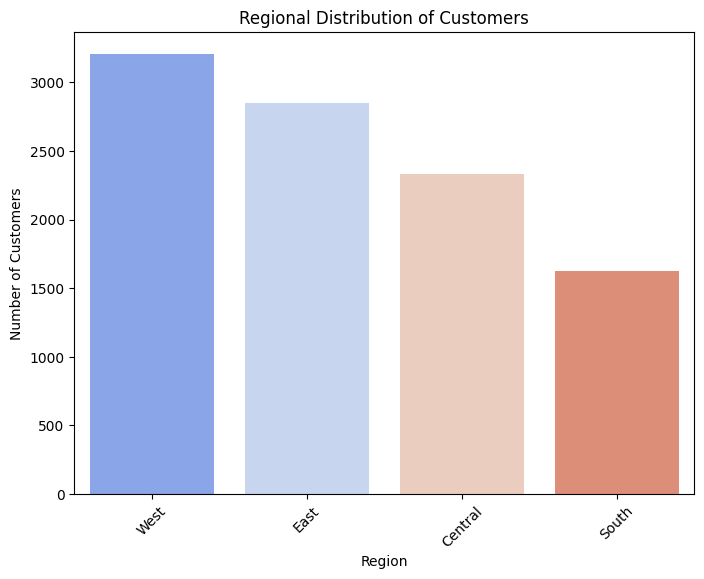

In [49]:
plt.figure(figsize=(8, 6))
sns.countplot(data=merged_df, x='Region', palette='coolwarm', order=df['Region'].value_counts().index)
plt.title('Regional Distribution of Customers')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()

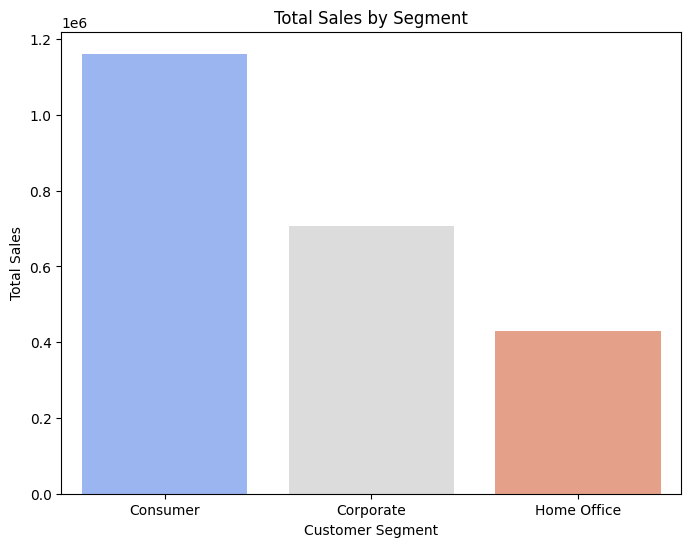

In [50]:
spending_by_segment = df.groupby('Segment')['Sales'].sum().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(data=spending_by_segment, x='Segment', y='Sales', palette='coolwarm')
plt.title('Total Sales by Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Total Sales')
plt.show()

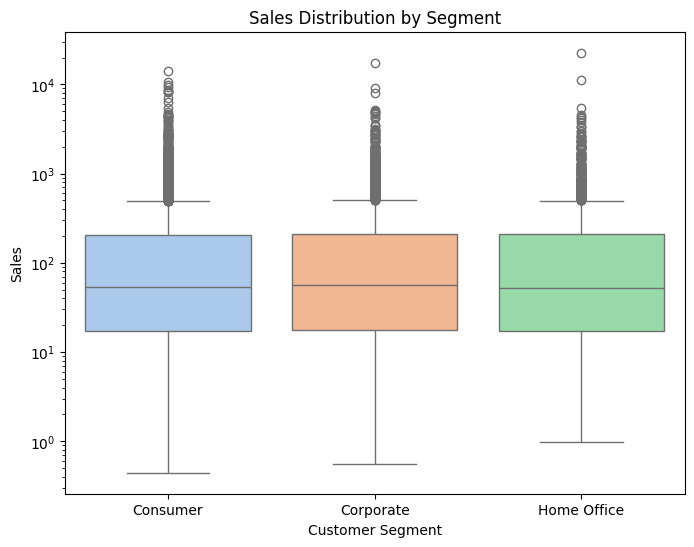

In [51]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Segment', y='Sales', palette='pastel')
plt.title('Sales Distribution by Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Sales')
plt.yscale('log')
plt.show()

In [52]:
#pip install streamlit